<a href="https://colab.research.google.com/github/Migaalee/AUX_python/blob/main/heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [21]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=55d70fdab4dc979ee3a6e0949cdf7f96975ce25a94cd922073d54009bd8e07a3
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [31]:
pip install fastcluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 1.6 MB/s eta 0:00:00


In [33]:
pip install PyComplexHeatmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.1 MB/s eta 0:00:00


In [159]:
# For general data science and matrix manipulation
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import csv

import pandas, numpy, matplotlib, scipy

# For pathway analysis in python
#import sspa
#import gseapy

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# For network creation and visualisation
import networkx as nx

#For regex
import re
import random

from google.colab import files
import zipfile

import shutil

import os
import sys
sys.path


import xml.etree.ElementTree as ET #Parse and read XML data
import tarfile #read from tarfile instead of extracting all data
import xml.etree.ElementTree as ET
from collections import Counter

import pprint as pp
import pickle
import site
site.getsitepackages()
from collections import defaultdict #I'm importing this library so we have a code with less lists!!
from bioinfokit import analys, visuz
from PyComplexHeatmap import *

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300


In [141]:
uploaded = files.upload()

Saving wolbachia_counts_TMM_test.csv to wolbachia_counts_TMM_test.csv


In [143]:
import io
df = pd.read_csv(io.BytesIO(uploaded['wolbachia_counts_TMM_test.csv']), sep=";", index_col=0)
df

,mRNA21,mRNA22,mRNA23,mRNA24,mRNA25,mRNA26,mRNA27,mRNA28,mRNA29,mRNA30,mRNA31,mRNA32,mRNA33,mRNA34,mRNA35,mRNA36,mRNA37,mRNA38,mRNA39,mRNA40
GQX68_RS00005,661,546,314,355,564,169,194,117,129,97,173,314,85,108,253,269,1119,356,802,410
GQX68_RS00010,66,59,34,61,58,19,44,16,8,12,27,31,16,31,37,36,126,54,136,36
GQX68_RS00020,585,510,319,536,492,163,292,213,265,101,148,256,148,208,184,337,892,409,1312,705
GQX68_RS00025,279,300,185,260,230,80,120,129,151,86,93,168,94,131,171,161,498,223,623,323
GQX68_RS00030,111,90,77,97,92,34,48,54,35,34,34,58,40,41,38,54,154,55,178,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GQX68_RS03470,149,129,99,178,152,60,97,89,111,44,51,54,54,59,60,131,351,158,457,250
GQX68_RS03475,246,206,126,211,189,76,128,127,119,65,70,122,67,99,92,146,443,225,584,300
GQX68_RS03480,769,582,313,625,548,222,355,407,381,180,235,339,246,246,330,444,1229,643,1716,996
GQX68_RS03485,1811,1706,927,1572,1515,955,1398,1514,1531,651,997,1609,1085,1486,1473,1154,2590,1221,3734,2048


In [175]:
uploaded = files.upload()

Saving meta.txt to meta.txt


In [178]:
df_col  = pd.read_csv("meta.txt",sep="\t",index_col=0)

In [179]:
df_col.head()

,status,DCV,teperature,ID
sample,,,,
mRNA21,Cs_25_no,no,25,mRNA21
mRNA22,Cs_25_no,no,25,mRNA22
mRNA23,Cs_25_no,no,25,mRNA23
mRNA24,Cs_25_no,no,25,mRNA24
mRNA25,Cs_25_no,no,25,mRNA25


In [100]:
# set gene names as index
#df = df.set_index(df.columns[0])
#df.head(2)

,mRNA21,mRNA22,mRNA23,mRNA24,mRNA25,mRNA26,mRNA27,mRNA28,mRNA29,mRNA30,mRNA31,mRNA32,mRNA33,mRNA34,mRNA35,mRNA36,mRNA37,mRNA38,mRNA39,mRNA40
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
GQX68_RS00005,661,546,314,355,564,169,194,117,129,97,173,314,85,108,253,269,1119,356,802,410
GQX68_RS00010,66,59,34,61,58,19,44,16,8,12,27,31,16,31,37,36,126,54,136,36


In [51]:
#total_counts = df.sum(axis=0)

# normalize counts to CPM
#cpm = (df / total_counts) * 1e6

#cpm.head()

,mRNA21,mRNA22,mRNA23,mRNA24,mRNA25,mRNA26,mRNA27,mRNA28,mRNA29,mRNA30,mRNA31,mRNA32,mRNA33,mRNA34,mRNA35,mRNA36,mRNA37,mRNA38,mRNA39,mRNA40
Gene,,,,,,,,,,,,,,,,,,,,
GQX68_RS00005,1725.015332,1614.691922,1566.537951,1059.366290,1706.092323,1397.953528,974.140095,673.241803,710.544145,1023.735897,1393.352180,1559.946147,695.899921,693.280952,1503.196521,1159.647709,1762.937662,1244.833591,942.050946,919.509296
GQX68_RS00010,172.240563,174.481362,169.625128,182.031954,175.449210,157.166373,220.938991,92.067255,44.064753,126.647740,217.459589,154.007422,130.992926,198.997310,219.835064,155.194489,198.507726,188.823073,159.749288,80.737402
GQX68_RS00020,1526.677714,1508.228718,1591.482823,1599.493891,1488.293303,1348.322042,1466.231484,1225.645334,1459.644948,1065.951811,1192.000709,1271.803228,1211.684569,1335.207760,1093.233833,1452.792854,1405.308664,1430.159940,1541.110774,1581.107448
GQX68_RS00025,728.107833,887.193364,922.960258,775.873903,695.746869,661.753150,602.560884,742.292244,831.722216,907.642136,749.027472,834.620869,769.583442,840.924118,1015.994486,694.064242,784.578155,779.769356,731.792692,724.393909
GQX68_RS00030,289.677310,266.158009,384.151026,289.460648,278.298748,281.245089,241.024354,310.726986,192.783295,358.835263,273.838001,288.142919,327.482316,263.189991,225.776553,232.791733,242.620554,192.319796,209.083626,150.261275


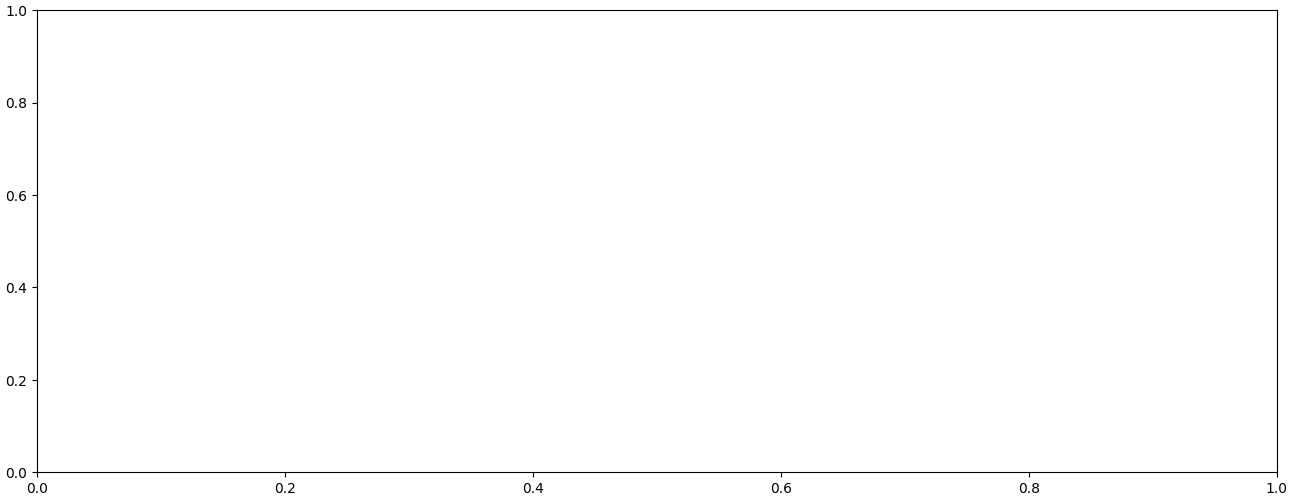

In [144]:
# heatmap with hierarchical clustering
visuz.gene_exp.hmap(df=df, dim=(16, 6), tickfont=(6, 4))

In [145]:
visuz.gene_exp.hmap(df=scaled_df, rowclus=False, colclus=False, dim=(3, 6), tickfont=(6, 4))


In [35]:
#standardise rows
#visuz.gene_exp.hmap(df=df, zscore=0, dim=(3, 6), tickfont=(6, 4))


In [183]:
df_col.head()

,status,DCV,teperature,ID
sample,,,,
mRNA21,Cs_25_no,no,25,mRNA21
mRNA22,Cs_25_no,no,25,mRNA22
mRNA23,Cs_25_no,no,25,mRNA23
mRNA24,Cs_25_no,no,25,mRNA24
mRNA25,Cs_25_no,no,25,mRNA25


In [196]:
DCV_col ={t:c for t,c in zip(['no','yes'],["green","red"])}
temp_col ={t:c for t,c in zip(['25','18'],["pink","blue"])}



In [104]:
scaler = StandardScaler()

# Fit_transform returns a scaled and centered version of the data
scaled_data = scaler.fit_transform(cpm.T)  # Transpose to scale across genes

# Convert back to DataFrame (optional, for ease of use)
scaled_df = pd.DataFrame(scaled_data, columns=cpm.index, index=cpm.columns).T


In [67]:
nan_in_df = df.isnull().values.any()

print(f"Are there any NaN values in the dataframe? {nan_in_df}")

Are there any NaN values in the dataframe? False


In [68]:
nan_per_column = df.isnull().sum()

print(nan_per_column)

mRNA21    0
mRNA22    0
mRNA23    0
mRNA24    0
mRNA25    0
mRNA26    0
mRNA27    0
mRNA28    0
mRNA29    0
mRNA30    0
mRNA31    0
mRNA32    0
mRNA33    0
mRNA34    0
mRNA35    0
mRNA36    0
mRNA37    0
mRNA38    0
mRNA39    0
mRNA40    0
dtype: int64


In [69]:
nan_per_row = df.isnull().sum(axis=1)

print(nan_per_row)

Gene
GQX68_RS00005    0
GQX68_RS00010    0
GQX68_RS00020    0
GQX68_RS00025    0
GQX68_RS00030    0
                ..
GQX68_RS06880    0
GQX68_RS06885    0
GQX68_RS06890    0
GQX68_RS06895    0
GQX68_RS06900    0
Length: 1281, dtype: int64


In [147]:
scaler = StandardScaler()

# scale and center
scaled_data = scaler.fit_transform(df.T)  # transpose to scale across genes

#scaled_data
 # back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.index, index=df.columns).T

In [180]:
scaled_df.head()

,mRNA21,mRNA22,mRNA23,mRNA24,mRNA25,mRNA26,mRNA27,mRNA28,mRNA29,mRNA30,mRNA31,mRNA32,mRNA33,mRNA34,mRNA35,mRNA36,mRNA37,mRNA38,mRNA39,mRNA40
GQX68_RS00005,1.175969,0.738664,-0.143550,0.012359,0.807112,-0.694934,-0.599868,-0.892671,-0.847040,-0.968724,-0.679723,-0.143550,-1.014356,-0.926895,-0.375511,-0.314669,2.917581,0.016161,1.712142,0.221504
GQX68_RS00010,0.624575,0.412855,-0.343289,0.473346,0.382609,-0.796976,-0.040832,-0.887713,-1.129679,-1.008696,-0.555010,-0.434027,-0.887713,-0.434027,-0.252552,-0.282798,2.439321,0.261626,2.741779,-0.282798
GQX68_RS00020,0.623125,0.365280,-0.291364,0.454666,0.303397,-0.827681,-0.384189,-0.655785,-0.477013,-1.040833,-0.879250,-0.507954,-0.879250,-0.672975,-0.755485,-0.229482,1.678569,0.018049,3.122499,1.035676
GQX68_RS00025,0.467579,0.621605,-0.221871,0.328222,0.108185,-0.992000,-0.698617,-0.632606,-0.471246,-0.947993,-0.896651,-0.346558,-0.889316,-0.617937,-0.324555,-0.397900,2.073849,0.056843,2.990670,0.790300
GQX68_RS00030,1.047590,0.516845,0.188288,0.693760,0.567392,-0.898476,-0.544646,-0.393004,-0.873202,-0.898476,-0.898476,-0.291910,-0.746834,-0.721561,-0.797382,-0.393004,2.134354,-0.367731,2.740920,-0.064448


In [149]:
# Ensure all data is numeric
scaled_df = scaled_df.apply(pd.to_numeric)

In [151]:
numeric_df_col = df_col.select_dtypes(include=[np.number])

# Now check for NaNs and infs in the numeric columns only
if numeric_df_col.isnull().values.any() or np.isinf(numeric_df_col.values).any():
    print("Annotations contain NaN or infinity values.")

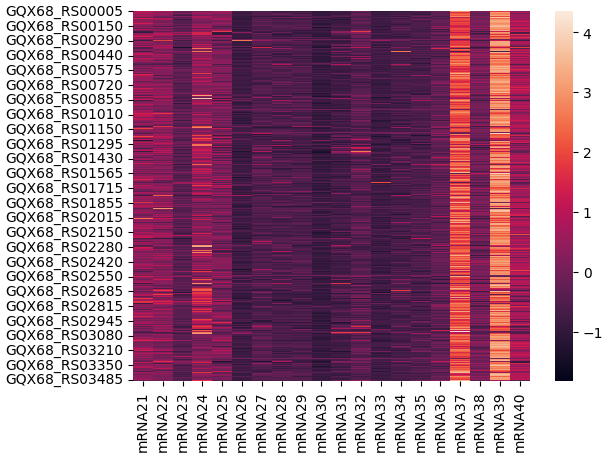

In [150]:
sns.heatmap(scaled_df)
plt.show()

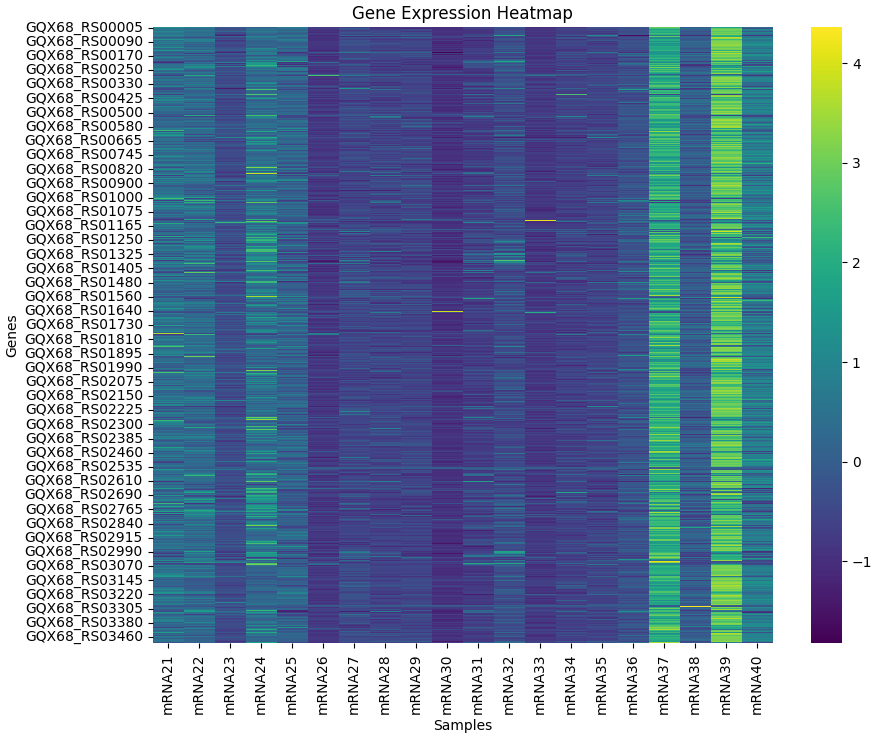

In [152]:

plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df, annot=False, cmap='viridis') # 'annot=True' to annotate cells, 'cmap' for color map
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Samples')
plt.show()

In [153]:
if scaled_df.isnull().values.any() or np.isinf(scaled_df.values).any():
    print("Data contains NaN or infinity values. Handling...")
    # Replace infinities with a very large number, you can also use mean, median, etc.
    scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Impute NaNs with the mean of the column
    scaled_df.fillna(scaled_df.mean(), inplace=True)

In [154]:
scaled_df = scaled_df.apply(pd.to_numeric)


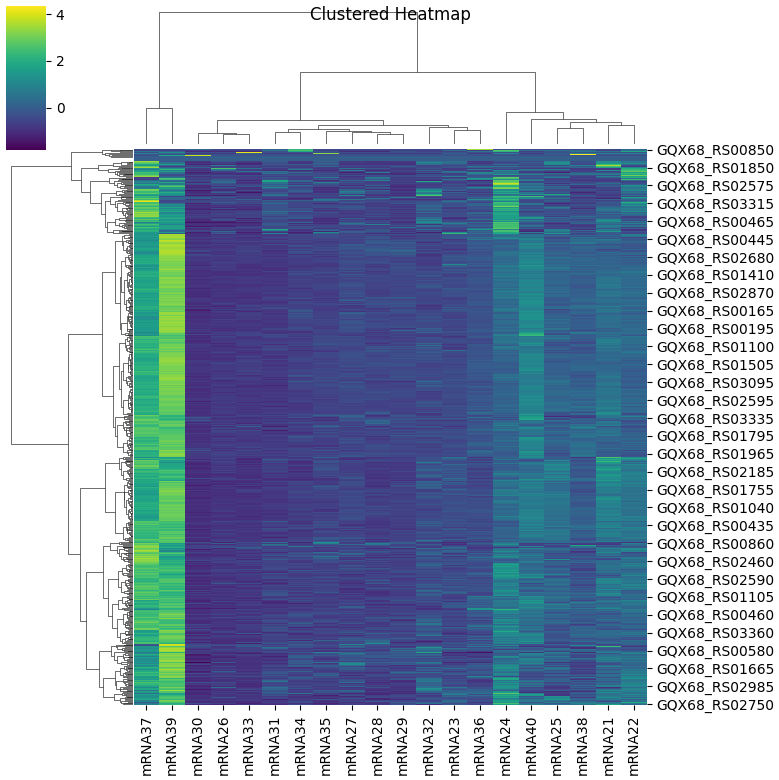

In [181]:
try:
    cluster_map = sns.clustermap(scaled_df, method='ward', metric='euclidean', cmap="viridis", figsize=(8, 8))
    cluster_map.fig.suptitle('Clustered Heatmap')
except FloatingPointError as e:
    print(f"An error occurred during clustering: {e}")

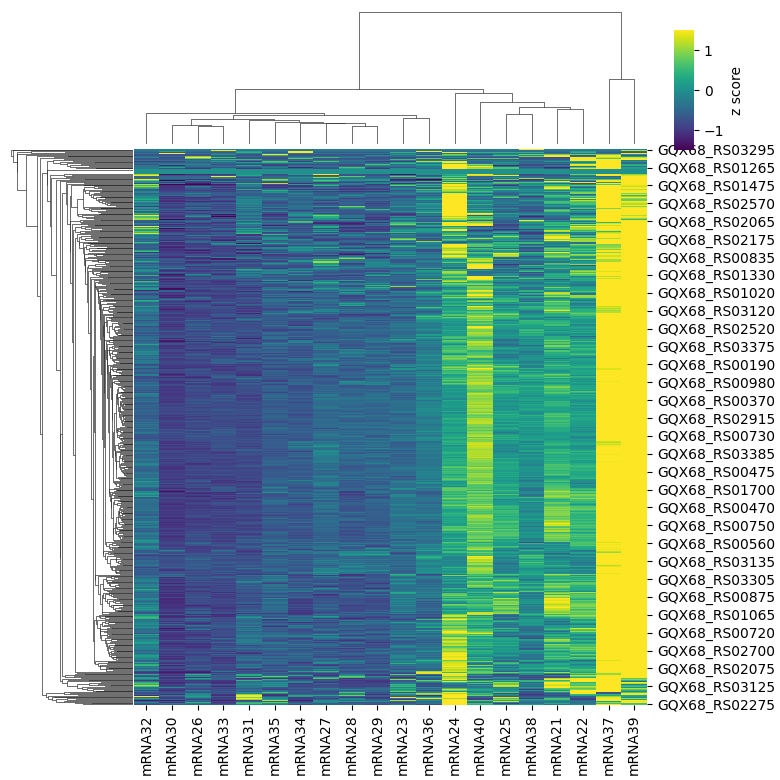

In [157]:
plot4=sns.clustermap(scaled_df,cmap="viridis",
                        figsize=(8,8),vmin=-1.5, vmax=1.5,cbar_kws=({"label": "z score"}),
                        cbar_pos=(0.855,0.8,0.025,0.15))

In [113]:
from PyComplexHeatmap import *

In [163]:
import PyComplexHeatmap as pch


In [167]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.family']='sans serif' #please remove this line if font is not installed
plt.rcParams['font.sans-serif']='Arial' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as pch
print(pch.__version__)

1.6.7


In [168]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df.head()

,AB,CD,EF,F
sample1,GroupA,C,E,-1.153067
sample2,GroupA,C,E,-0.412653
sample3,GroupA,C,E,-1.115797
sample4,GroupA,D,E,0.530634
sample5,GroupA,D,E,-0.010096


Starting plotting HeatmapAnnotations


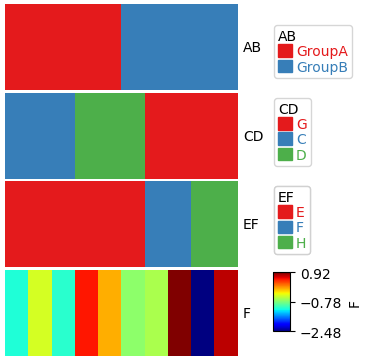

In [184]:
plt.figure(figsize=(3, 4))
col_ha = pch.HeatmapAnnotation(df=df,plot=True,legend=True,legend_gap=5,hgap=0.5,axis=1)
plt.show()

Starting plotting HeatmapAnnotations


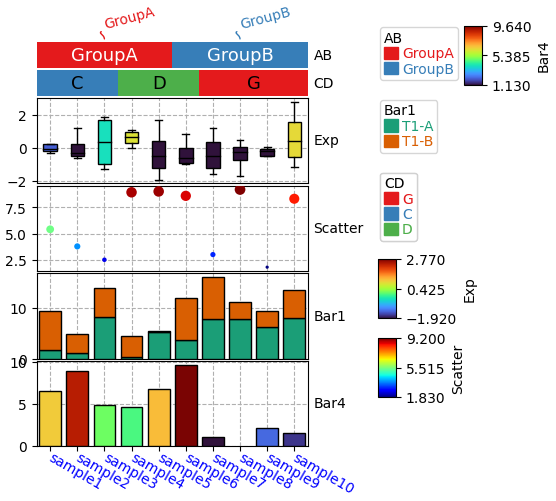

In [170]:
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan

plt.figure(figsize=(3.5, 5))
col_ha = pch.HeatmapAnnotation(label=pch.anno_label(df.AB, merge=True,rotation=15),
                            AB=pch.anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=pch.anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
                            Exp=pch.anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=pch.anno_scatterplot(df_scatter),
                           Bar1=pch.anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=pch.anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

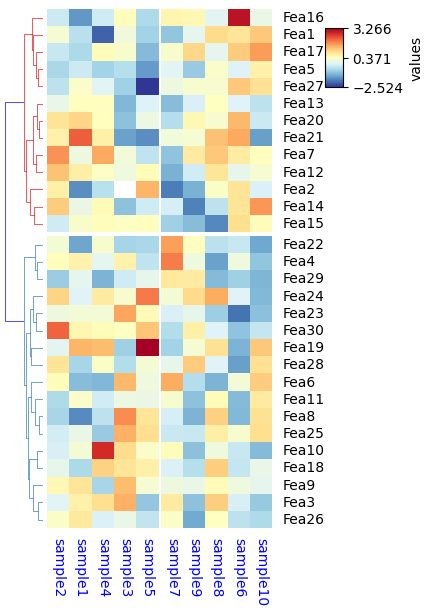

In [171]:
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(3.5, 6))
cm = pch.ClusterMapPlotter(data=df_heatmap,
                       col_cluster=True,row_cluster=True,
                       col_split=df.AB,row_split=2,
                       col_split_gap=0.5,row_split_gap=0.8,
                       label='values',row_dendrogram=True,
                       show_rownames=True,show_colnames=True,
                       row_names_side='right',
                       tree_kws={'row_cmap': 'Set1','colors':'blue'},verbose=0,legend_gap=5,
                       cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()


In [185]:
df_heatmap

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
Fea1,-0.632962,0.175301,0.094295,-2.110754,-0.870617,0.862989,-1.032766,0.989994,-0.090764,1.211612
Fea2,-1.670676,0.664236,NaN,-0.636914,1.439455,0.885944,-1.852536,0.292103,-1.289236,-0.251281
Fea3,0.636585,-0.171366,1.484728,0.953897,-1.023749,-0.301192,0.735116,1.154171,-1.097407,-0.999394
Fea4,0.611929,0.403740,0.603667,-0.125894,-0.579054,0.073254,1.968040,-1.481114,0.060437,-1.054231
Fea5,-0.418364,-0.800003,-0.663232,-0.858183,-1.550782,-0.228028,-0.169092,0.258492,-0.971463,0.627482
Fea6,-1.166265,0.427906,1.398704,-1.226231,0.074890,0.126886,1.536711,-1.273241,-0.682708,1.171659
Fea7,0.038315,1.759121,0.099344,1.558797,-0.577074,0.711001,-1.066445,1.208356,0.742654,0.388114
Fea8,-1.711867,-0.814021,1.839651,-0.582448,0.854801,-1.206302,-0.319000,1.122980,-1.269583,0.899080
Fea9,0.858415,0.526426,1.348245,-0.813041,0.187940,0.065074,0.041083,0.431602,-0.058928,-0.085381
Fea10,0.163630,-0.292401,0.969140,2.725598,0.278778,-0.475856,0.430574,0.057020,-1.100315,-1.174013


In [192]:
scaled_df1=scaled_df.iloc[:50, :]

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


Plotting legends..
Estimated legend width: 7.5 mm


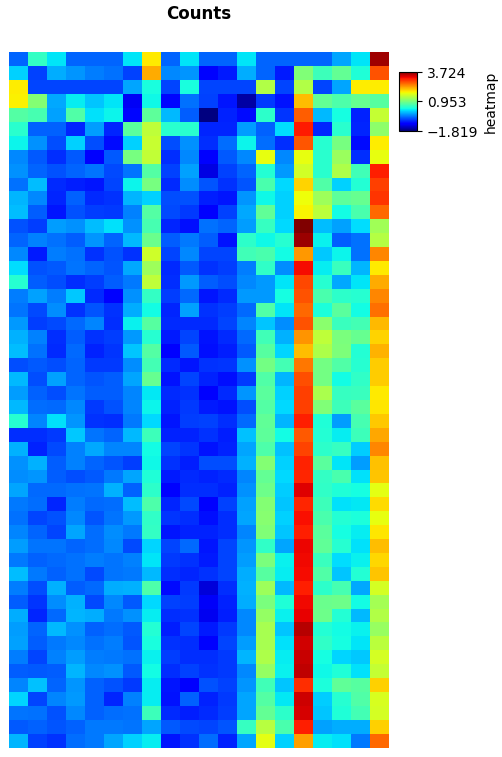

In [193]:
plt.figure(figsize=(5, 8))
cm = pch.ClusterMapPlotter(data=scaled_df1)
cm.ax.set_title("Counts",y=1.03,fontdict={'fontweight':'bold'})
plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

Starting plotting..


Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


Starting plotting HeatmapAnnotations


KeyError: 25

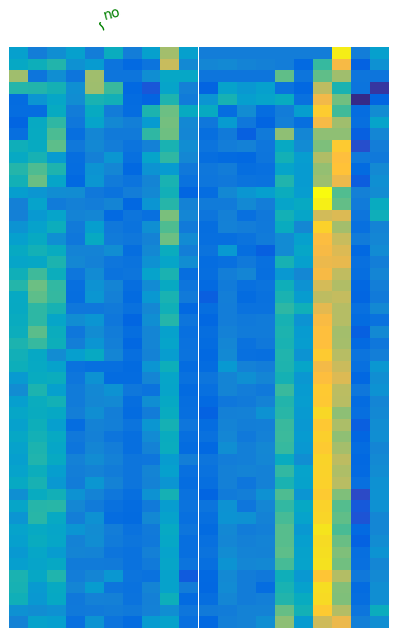

In [200]:
col_ha= HeatmapAnnotation(label=anno_label(df_col.DCV, colors=DCV_col,merge=True,rotation=15),
                          Strain=anno_simple(df_col.teperature, colors=temp_col,add_text=True),axis=1)


plt.figure(figsize=(5, 8))
cm = pch.ClusterMapPlotter(data=scaled_df1, top_annotation=col_ha,
                     show_rownames=False,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_col['DCV'],cmap='parula',
                     rasterized=True,row_split_gap=0,legend=True,legend_anchor='ax_heatmap',legend_vpad=5)
cm.ax.set_title("Counts",y=1.03,fontdict={'fontweight':'bold'})
plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

In [75]:
if np.isinf(scaled_df.values).any():
    print("Data contains infinity values.")
    # Handle infinities, for example by replacing them with a large finite number
    scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Decide on how to handle NaNs introduced by this replacement
    scaled_df.fillna(scaled_df.mean(), inplace=True)  # One way to handle NaNs

In [77]:
constant_columns = scaled_df.columns[(scaled_df.nunique() == 1)]
print("Constant columns:", constant_columns)
if len(constant_columns) > 0:
    scaled_df.drop(columns=constant_columns, inplace=True)

Constant columns: Index([], dtype='object')
